# Penarikan Kesimpulan dan Pengujian Hipotesis Data Matriks Kualitas Air

**Tugas Besar IF2220 Probabilitas dan Statistika**

Disusun oleh:
1. 13520047 Hana Fathiyah
2. 13520128 Bayu Samudra

---

## Requirement Modul Analisis
Pada tugas besar ini, kami menggunakan modul-modul sebagai berikut.
1. Numpy versi 1.22.3
2. Pandas versi 1.4.1
3. Seaborn versi 0.11.2
4. Matplotlib versi 3.5.1
5. Jupyterlab versi 3.3.2

Modul-modul tersebut dapat di-_install_ dengan perintah sebagai berikut.
```shell 
pip install -r requirements.txt
```
Berikut ini kami mencoba untuk melakukan _import library_ (pustaka) tersebut.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Persiapan Data
Diberikan suatu _dataset_ dengan nama `water_potability.csv`. Pada bagian ini, dataset tersebut akan di-_import_ ke dalam sebuah variabel yang diberi nama `data`

In [2]:
data = pd.read_csv("water_potability.csv")
data.head()

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
0,1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


## Nomor 1: Deskripsi Statistika
Pada nomor 1 ini, kami mencari deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. 

In [3]:
data.describe()

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
count,2010.00000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000
mean,1005.50000,7.087193,195.969209,21904.673439,7.134322,333.211376,426.476708,14.357940,66.400717,3.969497,0.402985
std,580.38134,1.572803,32.643166,8625.397911,1.585214,41.211111,80.701872,3.325770,16.081109,0.780471,0.490620
min,1.00000,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,503.25000,6.090785,176.740657,15614.412962,6.138326,307.626986,366.619219,12.122530,55.949993,3.442882,0.000000
50%,1005.50000,7.029490,197.203525,20926.882155,7.142014,332.214113,423.438372,14.323286,66.482041,3.967374,0.000000
75%,1507.75000,8.053006,216.447589,27170.534649,8.109933,359.268147,482.209772,16.683562,77.294613,4.514663,1.000000
max,2010.00000,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


Data di atas menampilkan rata-rata (ditunjukkan dengan mean), median (ditunjukkan dengan baris 50%), standar deviasi (ditunjukkan dengan std), nilai minimum (ditunjukkan dengan min), nilai maksimum (ditunjukkan dengan max), dan kuartil (ditunjukkan dengan 25% (Q1), 50% (Q2), dan 75% (Q3)).

Selanjutnya akan dicari nilai variansi untuk setiap kolom pada dataset `water_potability.csv` tersebut

In [4]:
data.var()

id                 3.368425e+05
pH                 2.473709e+00
Hardness           1.065576e+03
Solids             7.439749e+07
Chloramines        2.512904e+00
Sulfate            1.698356e+03
Conductivity       6.512792e+03
OrganicCarbon      1.106075e+01
Trihalomethanes    2.586021e+02
Turbidity          6.091350e-01
Potability         2.407079e-01
dtype: float64

Selanjutnya, akan dicari nilai range untuk setiap kolom pada dataset `water_potability.csv` tersebut

In [5]:
data.max() - data.min()

id                  2009.000000
pH                    13.772501
Hardness             243.845890
Solids             56167.729801
Chloramines           11.736129
Sulfate              352.030642
Conductivity         551.722883
OrganicCarbon         24.806707
Trihalomethanes      115.422987
Turbidity              5.044749
Potability             1.000000
dtype: float64

Selanjutnya akan dicari nilai IQR untuk setiap kolom pada dataset `water_potability.csv` tersebut

In [6]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
q3 - q1

id                  1004.500000
pH                     1.962221
Hardness              39.706932
Solids             11556.121687
Chloramines            1.971607
Sulfate               51.641161
Conductivity         115.590553
OrganicCarbon          4.561031
Trihalomethanes       21.344620
Turbidity              1.071781
Potability             1.000000
dtype: float64

Selanjutnya akan dicari nilai skewness untuk setiap kolom pada dataset `water_potability.csv` tersebut

In [7]:
data.skew()

id                 0.000000
pH                 0.048535
Hardness          -0.085321
Solids             0.591011
Chloramines        0.013003
Sulfate           -0.045728
Conductivity       0.268012
OrganicCarbon     -0.020220
Trihalomethanes   -0.051383
Turbidity         -0.032266
Potability         0.395873
dtype: float64

Selanjutnya ditentukan nilai kurtosis untuk setiap kolom pada dataset `water_potability.csv` tersebut

In [8]:
data.kurtosis()

id                -1.200000
pH                 0.626904
Hardness           0.525480
Solids             0.337320
Chloramines        0.549782
Sulfate            0.786854
Conductivity      -0.237206
OrganicCarbon      0.031018
Trihalomethanes    0.223017
Turbidity         -0.049831
Potability        -1.845122
dtype: float64

Selanjutnya akan dicari nilai modus untuk setiap kolom pada dataset `water_potability.csv` tersebut

In [9]:
data.mode()

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
0,1,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.0
1,2,0.989912,77.459586,1198.943699,1.920271,180.206746,210.319182,4.371899,14.343161,1.492207,NaN
2,3,1.431782,81.710895,1351.906979,2.397985,182.397370,233.907965,4.466772,15.684877,1.496101,NaN
3,4,1.757037,94.091307,1372.091043,2.456014,187.170714,245.859632,4.861631,16.291505,1.680554,NaN
4,5,1.985383,94.812545,2552.962804,2.458609,187.424131,252.968328,4.966862,17.527765,1.812529,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2005,2006,11.568768,286.567991,50793.898917,12.580026,458.441072,666.690618,23.569645,114.034946,6.307678,NaN
2006,2007,11.898078,287.975540,53735.899194,12.626900,460.107069,669.725086,23.604298,114.208671,6.357439,NaN
2007,2008,12.246928,300.292476,55334.702799,12.653362,475.737460,695.369528,23.917601,116.161622,6.389161,NaN
2008,2009,13.349889,306.627481,56351.396304,13.043806,476.539717,708.226364,24.755392,120.030077,6.494249,NaN


In [10]:
data.shape

(2010, 11)

Pada data di atas, terlihat bahwa nilai modus pada kolom selain kolom _portability_ memiliki nilai lebih dari satu. Lebih jauh lagi, setiap kolom numerik selain kolom _portability_ memiliki data yang unik sehingga semua nilai merupakan nilai modus.

## Nomor 2: Visualisasi
Pada nomor ini, akan ditampilkan visualisasi distribusi plot untuk setiap kolom numerik

### Data pH
Berikut ini adalah histogram untuk data pH pada dataset `water_portability.csv`

<AxesSubplot:xlabel='pH', ylabel='Count'>

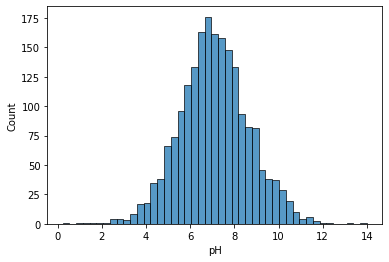

In [11]:
sns.histplot(data,x="pH")

Berikut ini adalah boxplot untuk data pH pada dataset `water_portability.csv`

<AxesSubplot:xlabel='pH'>

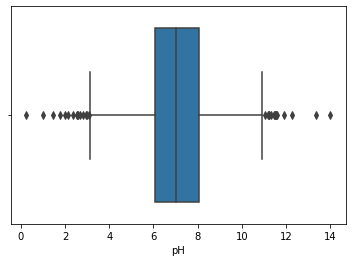

In [12]:
sns.boxplot(data = data, x = "pH")

### Data Hardness
Berikut ini adalah histogram untuk data Hardness pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Hardness', ylabel='Count'>

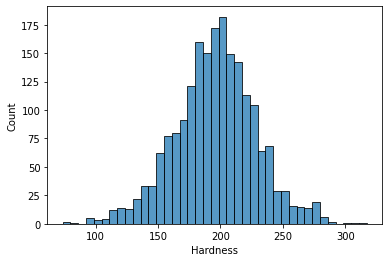

In [13]:
sns.histplot(data,x="Hardness")

Berikut ini adalah boxplot untuk data Hardness pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Hardness'>

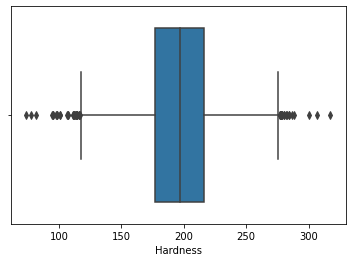

In [14]:
sns.boxplot(data = data, x = "Hardness")

### Data Solids
Berikut ini adalah histogram untuk data Solids pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Solids', ylabel='Count'>

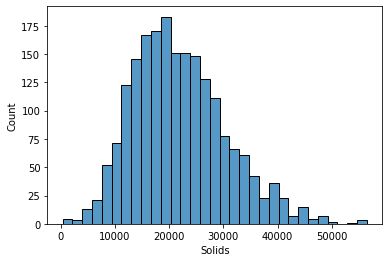

In [15]:
sns.histplot(data,x="Solids")

Berikut ini adalah boxplot untuk data Solids pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Solids'>

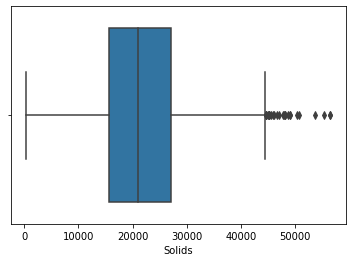

In [16]:
sns.boxplot(data = data, x = "Solids")

### Data Chloramines
Berikut ini adalah histogram untuk data Chloramines pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Chloramines', ylabel='Count'>

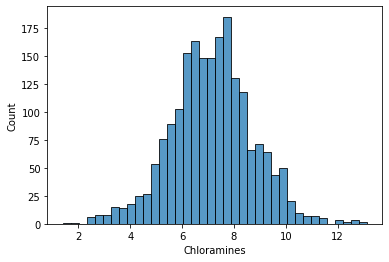

In [17]:
sns.histplot(data,x="Chloramines")

Berikut ini adalah boxplot untuk data Chloramines pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Chloramines'>

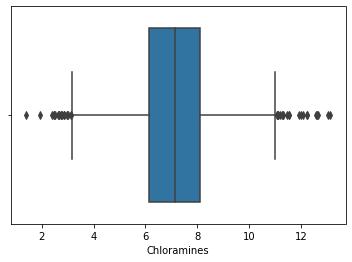

In [18]:
sns.boxplot(data = data, x = "Chloramines")

### Data Sulfate
Berikut ini adalah histogram untuk data Sulfate pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Sulfate', ylabel='Count'>

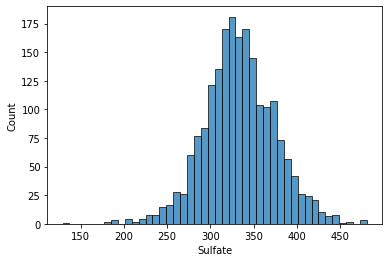

In [19]:
sns.histplot(data,x="Sulfate")

Berikut ini adalah boxplot untuk data Sulfate pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Sulfate'>

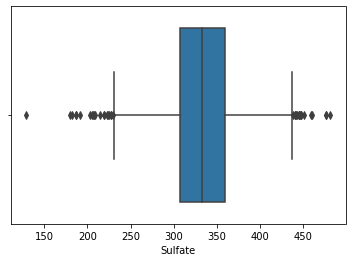

In [20]:
sns.boxplot(data = data, x = "Sulfate")

### Data Conductivity
Berikut ini adalah histogram untuk data Conductivity pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Conductivity', ylabel='Count'>

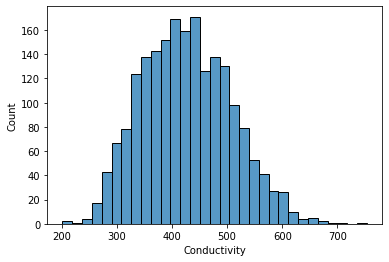

In [21]:
sns.histplot(data,x="Conductivity")

Berikut ini adalah boxplot untuk data Conductivity pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Conductivity'>

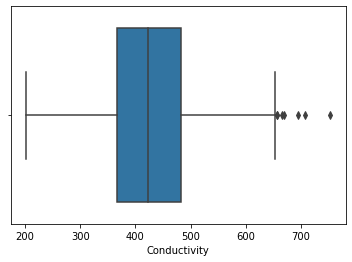

In [22]:
sns.boxplot(data = data, x = "Conductivity")

### Data OrganicCarbon
Berikut ini adalah histogram untuk data OrganicCarbon pada dataset `water_portability.csv`

<AxesSubplot:xlabel='OrganicCarbon', ylabel='Count'>

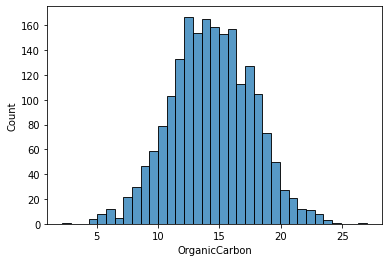

In [23]:
sns.histplot(data,x="OrganicCarbon")

Berikut ini adalah boxplot untuk data Conductivity pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Conductivity'>

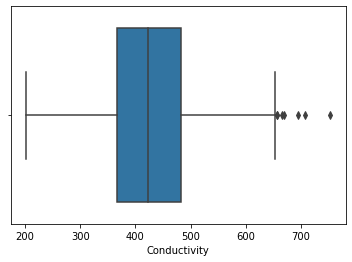

In [24]:
sns.boxplot(data = data, x = "Conductivity")

### Data Trihalomethanes
Berikut ini adalah histogram untuk data Trihalomethanes pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Trihalomethanes', ylabel='Count'>

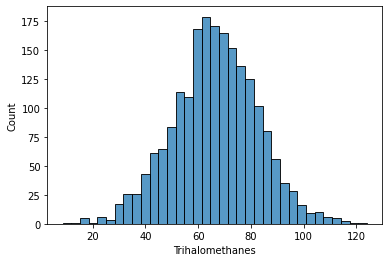

In [25]:
sns.histplot(data,x="Trihalomethanes")

Berikut ini adalah boxplot untuk data Trihalomethanes pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Trihalomethanes'>

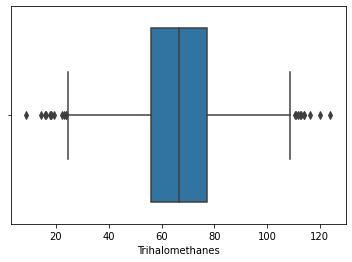

In [26]:
sns.boxplot(data = data, x = "Trihalomethanes")

### Data Turbidity
Berikut ini adalah histogram untuk data Turbidity pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Turbidity', ylabel='Count'>

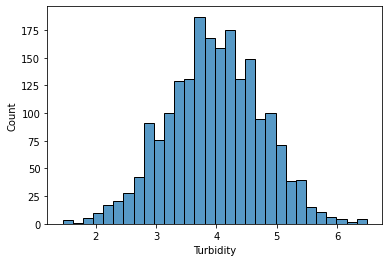

In [27]:
sns.histplot(data,x="Turbidity")

Berikut ini adalah boxplot untuk data Turbidity pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Turbidity'>

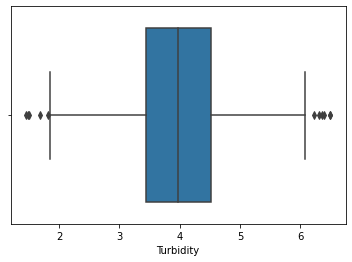

In [28]:
sns.boxplot(data = data, x = "Turbidity")

## Nomor 6: Korelasi

In [29]:
data.corr()

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
id,1.000000,-0.031175,-0.014818,-0.021336,0.004946,0.052322,-0.034291,0.035022,-0.026509,0.024003,0.122027
pH,-0.031175,1.000000,0.108959,-0.085582,-0.024767,0.011028,0.015089,0.028285,0.018302,-0.035416,0.015475
Hardness,-0.014818,0.108959,1.000000,-0.053282,-0.022684,-0.108509,0.011778,0.013219,-0.015400,-0.034813,-0.001463
Solids,-0.021336,-0.085582,-0.053282,1.000000,-0.051933,-0.164106,-0.007045,-0.005290,-0.015729,0.018569,0.038977
Chloramines,0.004946,-0.024767,-0.022684,-0.051933,1.000000,0.006248,-0.028300,-0.023806,0.014990,0.013132,0.020779
Sulfate,0.052322,0.011028,-0.108509,-0.164106,0.006248,1.000000,-0.016600,0.026823,-0.023355,-0.010129,-0.015703
Conductivity,-0.034291,0.015089,0.011778,-0.007045,-0.028300,-0.016600,1.000000,0.015739,0.004879,0.012133,-0.016257
OrganicCarbon,0.035022,0.028285,0.013219,-0.005290,-0.023806,0.026823,0.015739,1.000000,-0.005666,-0.015388,-0.015488
Trihalomethanes,-0.026509,0.018302,-0.015400,-0.015729,0.014990,-0.023355,0.004879,-0.005666,1.000000,-0.020504,0.009237
Turbidity,0.024003,-0.035416,-0.034813,0.018569,0.013132,-0.010129,0.012133,-0.015388,-0.020504,1.000000,0.022331
